In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Introduction to Digital Forensics - Assignment 1

### Tor2Door Darknet Market data analysis



| Name | Student-Nr. |
|------|-------------|
|  Mai Lan Vu    | s1680234    |
|   Benjamin Othmer   | s2554267    |
|  Daniel Mocanu    | s2539748    |
|  Aleksander Petrov   | s2615576    |

### Categories

We will be analyzing the data samples that we collected.

This data was collected from the "tor2door" as located on the dark web.
We accessed the market by creating our own user accounts and the data was collected between the 21.10.22 and 25.10.22

The sales, as found in the data/Sales.csv file have the following columns:
Name, Market Category, Seller, Ranking (Legal/Illegal/Depends) and Reason (for the Ranking)
The data includes 102 Data points

The Vendors, as found in the data/Top_Vendors.csv file have the following columns:
Name, Count
We also included sales data on some of the sellers on the website of whome we noticed that there are only a total of 35 Sellers that have >0 sales.
The dataset contains 35 vendors.

In [23]:

data = pd.read_csv('data/Sales.csv', delimiter=';', skiprows=0, low_memory=False)
vendors = pd.read_csv('data/Top_Vendors.csv', delimiter=',', skiprows=0, low_memory=False)
#sales
print(list(data.columns))
print(data.shape)
#vendors
print(list(vendors.columns))
print(vendors.shape)


#Cleaning up the data
data['Ranking (Legal/Illegal/Depends)'] = data['Ranking (Legal/Illegal/Depends)'].str.lower()
data['Ranking (Legal/Illegal/Depends)'] = data['Ranking (Legal/Illegal/Depends)'].str.strip()
data['Seller'] = data['Seller'].str.lower()
data['Seller'] = data['Seller'].str.strip()
vendors['Name'] = vendors['Name'].str.lower()
vendors['Name'] = vendors['Name'].str.strip()


['Name', 'Market Category', 'Seller', 'Ranking (Legal/Illegal/Depends)', 'Reason']
(103, 5)
['Name', 'Count']
(35, 2)


0       True
1       True
2       True
3       True
4       True
       ...  
98     False
99     False
100     True
101     True
102     True
Name: Seller, Length: 103, dtype: bool

### Top Vendor Sales distribution
First, we are going to look at the distribution of sales on the platform

As we can see the largest part of the market share belongs to a few vendors only.
This is in stark contrast to the amount of total items that were offered on the marketplace.

The first 3 vendors (heartkidnapper, DangerousTomato, HarleyQuinn) account for circa 60% of the market share.

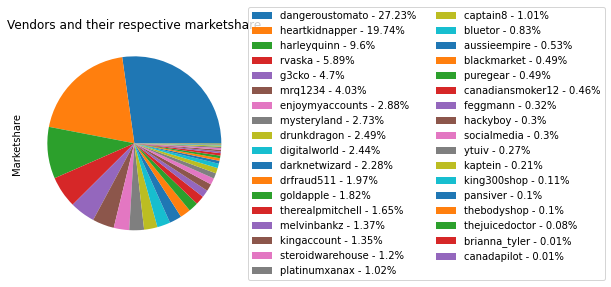

In [3]:

result = vendors['Count'].aggregate('sum')

#vendors = vendors[vendors['Marketshare'] > 1]

vendors['Marketshare'] = vendors['Count'] / result * 100
labels = [f'{i} - {round(j,2)}%' for i, j in zip(vendors.Name, vendors.Marketshare)]
pie = vendors['Marketshare'].plot(kind='pie', x='Name', labels=labels,  labeldistance=None, title='Vendors and their respective marketshare')
pie.legend(loc='center left',  bbox_to_anchor=(1.0, 0.5), ncol=2)



### Sales - Count per Category

Below, the categories of data that we analyzed - as well as the count of data points


Services             34
Digital Products     20
Steroids             18
Drugs & Chemicals    15
Counterfeit Items     8
Data                  6
Fraud                 2
Name: Market Category, dtype: int64


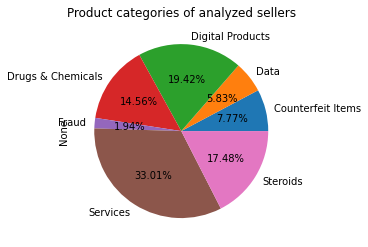

In [4]:
data.groupby('Market Category').size().plot(kind='pie', autopct='%.2f%%', title='Product categories of analyzed sellers')

print(data['Market Category'].value_counts())


We notice that if we remove all the vendors that have not had a sale yet, the data points shift:
Suddenly, The share of Steroids and Market Share reduces drastically

This could be explained by the high volatility of vendors in the "Steroids" and "Drugs & Chemicals" Segment

<AxesSubplot:title={'center':'Product categories of analyzed sellers that have sales on record'}, ylabel='None'>

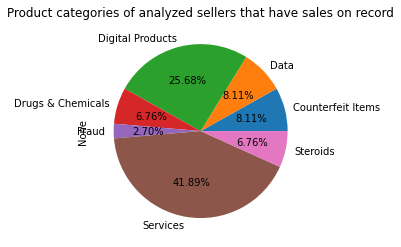

In [5]:
df_final = data[data['Seller'].isin(vendors['Name'])]
df_final.groupby('Market Category').size().plot(kind='pie', autopct='%.2f%%', title='Product categories of analyzed sellers that have sales on record')
#df_final.groupby('Market Category').size().plot(kind='pie', autopct='%.2f')

This is an overview of the amount of data points we have where the Seller has made no prior sales

This shows that there are a high variety of sellers in the drugs & chemicals as well as steroids categories

In [6]:
print("Difference when removing all the Sellers that have not made a sale yet:")
print(data['Market Category'].value_counts() - df_final['Market Category'].value_counts())

Difference when removing all the Sellers that have not made a sale yet:
Counterfeit Items     2
Data                  0
Digital Products      1
Drugs & Chemicals    10
Fraud                 0
Services              3
Steroids             13
Name: Market Category, dtype: int64


### Category Distribution

We have a high concentration of data points in the following categories: **Drugs & Chemicals, Steroids, Digital Products and Services**


Market Category
Counterfeit Items     8
Data                  6
Digital Products     20
Drugs & Chemicals    15
Fraud                 2
Services             34
Steroids             18
dtype: int64



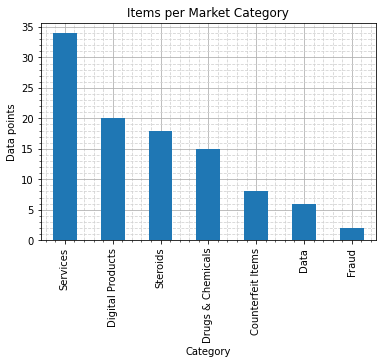

In [7]:
sr = data.groupby('Market Category').size()
print(sr)
sr.sort_values(ascending=False, inplace=True)
print()
plt = sr.plot(kind='bar', title="Items per Market Category", xlabel='Category', ylabel='Data points')
plt.minorticks_on()
plt.set_axisbelow(True)
plt.grid(which='major')
plt.grid(which='minor', color='lightgray', linestyle='--')


### Sales - Distribution of sales per Vendor

Below is an overview of the amount of offers we have per seller that we collected in the data:

We have a total of 50 unique sellers in this dataset.


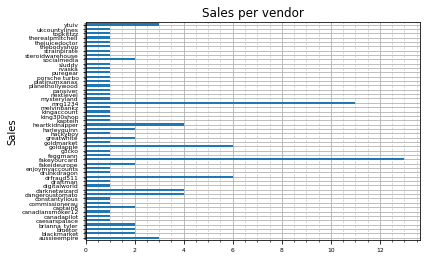

In [8]:
#Distinct Sellers

plt = data.sort_values('Seller').groupby('Seller').size().plot(kind='barh', fontsize=6, title='Sales per vendor', xlabel='Sales', ylabel='Vendor')
plt.minorticks_on()
plt.set_axisbelow(True)
plt.grid(which='major')
plt.grid(which='minor', color='lightgray', linestyle='--', axis='x')
seller_count = len(data.groupby('Seller').size())

print(f"We have a total of {seller_count} unique sellers in this dataset.")


### Seller Overview - Market Category: Services

<AxesSubplot:title={'center':'Sales distribution - Services'}, ylabel='None'>

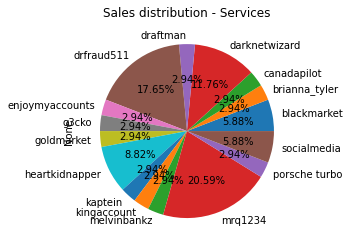

In [9]:
target = 'Services'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f%%', title='Sales distribution - Services')


Most common words in description:
{'that': 18}
Most common words in title:
{'DrFRAUDs': 4, 'with': 3, 'Carding': 3}


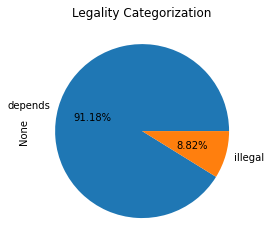

In [10]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f%%', title='Legality Categorization')
descr = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
new_descr = {key: var for key,
            var in descr.items() if len(key) > 3}
title = dict(Counter(" ".join(df['Name']).split()).most_common(10))
new_title = {key: var for key,
            var in title.items() if len(key) > 3}
print("Most common words in description:")
print(new_descr)
print("Most common words in title:")
print(new_title)

### Seller Overview - Market Category: Digital Products

<AxesSubplot:title={'center':'Sales distribution - Services'}, ylabel='None'>

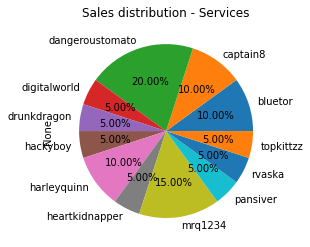

In [11]:
target = 'Digital Products'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f%%', title='Sales distribution - Services')
#print(f"Number of sales per seller in category: {target}")
#display(df.groupby('Seller').size())


Most common words in description:
{'illegal': 11, 'could': 7}
Most common words in title:
{'-': 6, 'Android': 3, 'and': 3, 'Complete': 3, 'PORN': 3, 'RAT': 2, 'Hack': 2, 'More': 2, 'Advanced': 2, 'verification': 2}


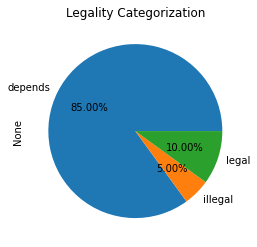

In [12]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f%%', title='Legality Categorization')
descr = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
new_descr = {key: var for key,
            var in descr.items() if len(key) > 3}
title = dict(Counter(" ".join(df['Name']).split()).most_common(10))
new_title = {key: var for key,
            var in title.items() if len(key) > 3}
print("Most common words in description:")
print(new_descr)
print("Most common words in title:")
print(title)

### Seller Overview - Market Category: Steroids

In our data set we classified most posts as legal

<AxesSubplot:title={'center':'Sales distribution - Steroids'}, ylabel='None'>

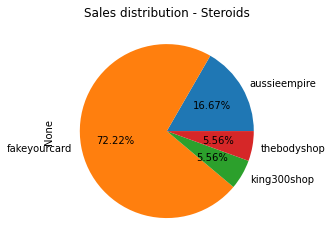

In [13]:
target = 'Steroids'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f%%', title='Sales distribution - Steroids')
#print(f"Number of sales per seller in category: {target}")
#display(df.groupby('Seller').size())

Most common words in description:
{'prescription': 9, 'with': 9, 'only': 6, 'used': 5, 'illegal': 4}
Most common words in title:
{'25mgs': 6, '30mL': 5, '30ml': 4, 'each': 2, 'TRENBOLONE': 1, 'ACETATE': 1, '100MG-MEDITECH': 1}


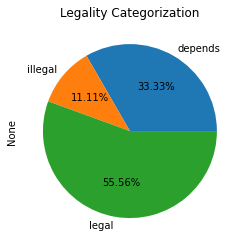

In [14]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f%%', title='Legality Categorization')
descr = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
new_descr = {key: var for key,
            var in descr.items() if len(key) > 3}
title = dict(Counter(" ".join(df['Name']).split()).most_common(10))
new_title = {key: var for key,
            var in title.items() if len(key) > 3}
print("Most common words in description:")
print(new_descr)
print("Most common words in title:")
print(new_title)

### Seller Overview - Market Category: Drugs and Chemicals

As can be seen this is the market category where we have the highest variance in sellers.
Most posts are clearly classified as illegal.

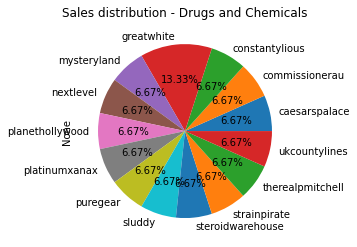

In [15]:
target = 'Drugs & Chemicals'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f%%', title='Sales distribution - Drugs and Chemicals')
#print(f"Number of sales per seller in category: {target}")
#display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))

Most common words in description:
{'illegal': 10, 'possession': 6, 'selling': 6}
Most common words in title:
{'autoflower': 2, 'Colobian': 1, 'Cocain': 1, '93%+': 1}


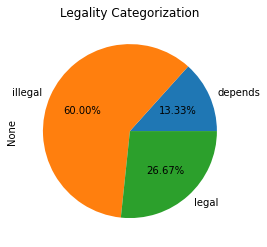

In [16]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f%%', title='Legality Categorization')
descr = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
new_descr = {key: var for key,
            var in descr.items() if len(key) > 3}
title = dict(Counter(" ".join(df['Name']).split()).most_common(10))
new_title = {key: var for key,
            var in title.items() if len(key) > 3}
print("Most common words in description:")
print(new_descr)
print("Most common words in title:")
print(new_title)

### Seller Overview - Market Category: Counterfeit Items

There is a relatively high variance in sellers for this category and half the posts are classified as illegal.

<AxesSubplot:title={'center':'Sales distribution - Counterfeit Items'}, ylabel='None'>

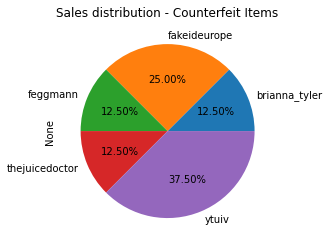

In [17]:
target = 'Counterfeit Items'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f%%', title='Sales distribution - Counterfeit Items')
#print(f"Number of sales per seller in category: {target}")
#display(df.groupby('Seller').size())


Most common words in description:
{'fake': 7, 'using': 6, 'illegal.': 4, 'item': 3}
Most common words in title:
{'Fake': 3, 'License': 2, 'Book': 1, 'Safe': 1, 'Storage': 1, 'Box,': 1, 'with': 1, 'Security': 1, 'Combination': 1, 'Lock/Key': 1}


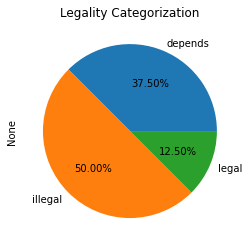

In [18]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f%%', title='Legality Categorization')
descr = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
new_descr = {key: var for key,
            var in descr.items() if len(key) > 3}
title = dict(Counter(" ".join(df['Name']).split()).most_common(10))
new_title = {key: var for key,
            var in title.items() if len(key) > 3}
print("Most common words in description:")
print(new_descr)
print("Most common words in title:")
print(new_title)

### Seller Overview - Market Category: Data

Our Data set only includes a single seller, of whom all posts are illegal.
This is relatively straight forward, as most of the data is stolen (illegally).

<AxesSubplot:title={'center':'Sales distribution - Data'}, ylabel='None'>

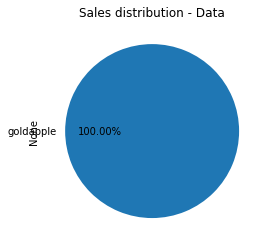

In [19]:
target = 'Data'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f%%', title='Sales distribution - Data')
#print(f"Number of sales per seller in category: {target}")
#display(df.groupby('Seller').size())


Most common words in description:
{'contains': 4, 'This': 3, 'personal': 3, 'data': 3, 'that': 3, 'item': 2, 'IDs,': 2, 'Full': 2, 'Names,': 2}
Most common words in title:
{'Database': 4, 'Million': 3, 'Voter': 2, 'Emails': 2, 'Oregon': 1, '0.82': 1, 'Romanian': 1, 'DFB.de': 1, 'Ohio': 1}


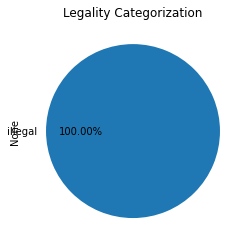

In [20]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f%%', title='Legality Categorization')
descr = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
new_descr = {key: var for key,
            var in descr.items() if len(key) > 3}
title = dict(Counter(" ".join(df['Name']).split()).most_common(10))
new_title = {key: var for key,
            var in title.items() if len(key) > 3}
print("Most common words in description:")
print(new_descr)
print("Most common words in title:")
print(new_title)

### Seller Overview - Market Category: Fraud

There are a few "funny" posts in this category, e.g. "Randomly buy an item it will 100% return your value" - while being in the fraud section.
Most of these posts are "educational" material and classified as legal/depends.

<AxesSubplot:title={'center':'Sales distribution - Fraud'}, ylabel='None'>

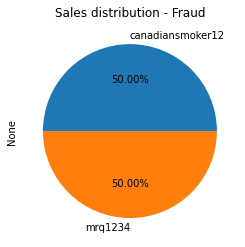

In [21]:
target = 'Fraud'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f%%', title='Sales distribution - Fraud')
#print(f"Number of sales per seller in category: {target}")
#display(df.groupby('Seller').size())


Most common words in description:
{'would': 1, 'illegal': 1, 'botnet': 1, 'from': 1, 'market': 1}
Most common words in title:
{'genesis.market': 1, 'invite': 1, 'RANDOM': 1, 'SUPRISE': 1, 'VALUABLE': 1, 'ITEM': 1, '100%': 1, 'GUARANTEED': 1, 'PROFIT': 1}


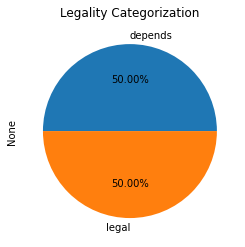

In [22]:
df = data[(data['Market Category'] == target)]
df.groupby('Ranking (Legal/Illegal/Depends)').size().plot(kind='pie',  autopct='%.2f%%', title='Legality Categorization')
descr = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
new_descr = {key: var for key,
            var in descr.items() if len(key) > 3}
title = dict(Counter(" ".join(df['Name']).split()).most_common(10))
new_title = {key: var for key,
            var in title.items() if len(key) > 3}
print("Most common words in description:")
print(new_descr)
print("Most common words in title:")
print(new_title)

### Conclusion

We can conclude the following from this data:
We have a large amount of drug sales, with a high variety of sellers that have not yet made a single sale on the market.
The same applies to steroids. Drugs and Steroids were also the category that was easily to classify - as it is clear which substances are legal or illegal to purchase/sell.
There is only a single vendor that we identified who sells data and since this data is stolen it is classified as illegal every time. The seller "Goldapple" of all of our data categories actually has made quite a few sales, so we can assume that stolen data is being sold on this market.
The two most popular categories on the market are Digital Products and Services. They also contain a relatively high variance in sellers, but they are mostly classified as "depends/legal" because most of these products themselves are not illegal - only if utilized with intent and without consent.
The services mainly include educational material, which is not strictly illegal.
We assume that due to the relative legality, most of the sellers in the two aforementioned categories have good sales records.
Overall, we believe that the sales in the categories "Services", "Digital Products" and "Data" are the most legitimate and usually legal to buy - which makes for a great sale on this marketplace and there is not a lot that can be done to combat this. We were also surprised about the amount of database leaks and malware that was sold, it would be interesting to research these two categories further to verify how useful they could be to a potential attacker or if they are just mass-distributed and low-quality.

